In [8]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import basename

def load_features(folder):
    dataset = pd.DataFrame(columns = ["label", "Thumb","Index","Middle","Ring","Pinky","ax","ay","az","gx","gy","gz"])
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        current_dataset = pd.read_csv(filename)
        #print(current_dataset)
        dataset = pd.concat([dataset, current_dataset], ignore_index=True, axis=0)
    print("# of data loaded: ")
    print(dataset.groupby('label').size())
    return dataset


In [2]:
dataset = load_features("static_data")
print(dataset)

# of data in each class: 
label
A     646
B    1225
C    1590
D    1120
dtype: int64
     label Thumb Index Middle Ring Pinky        ax        ay        az  \
0        A    -1   110    113  117   120  3.164508  0.723829  9.416954   
1        A    -5   109    107  108   112  3.164508  0.723829  9.416954   
2        A    -5   103    102  104   109  3.164508  0.723829  9.416954   
3        A    -4    96    100   98   109  3.164508  0.723829  9.416954   
4        A    -5    98     96   97   102  3.164508  0.723829  9.416954   
...    ...   ...   ...    ...  ...   ...       ...       ...       ...   
4576     A     8    78     80   85    65 -0.476172  8.000402  5.475975   
4577     A     9    81     78   86    63 -0.476172  8.000402  5.475975   
4578     A     8    80     75   84    65 -0.476172  8.000402  5.475975   
4579     A    10    81     80   85    63 -0.476172  8.000402  5.475975   
4580     A     8    80     78   85    61 -0.476172  8.000402  5.475975   

            gx        gy  

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def get_model(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, max_depth=5)
    clf.fit(X_train, y_train)
    return clf

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def generate_heatmap(X_test, y_test, clf):
    # Perform cross-validation to get predictions
    y_test_pred = clf.predict(X_test)

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    disp.figure_.suptitle(f"Confusion Matrix")
    plt.show()

In [5]:
!python -m pip install micromlgen


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


# of data loaded: 
label
A     646
B    1225
C    1590
D    1120
dtype: int64
# of data in each class:
Class      Training    Testing    Total
-------  ----------  ---------  -------
A               443        203      646
B               842        383     1225
C              1055        535     1590
D               729        535     1120


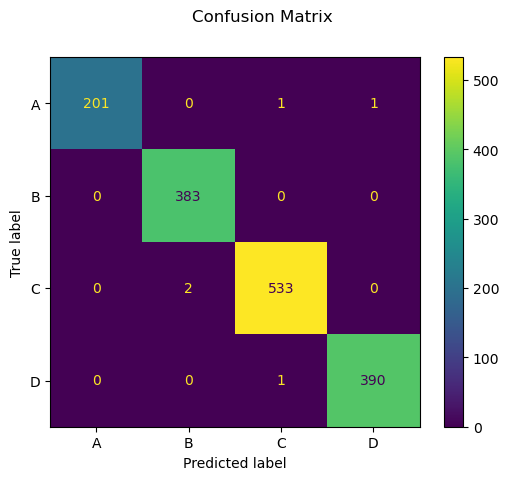

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[4] = { 0 };
                        // tree #1
                        if (x[3] <= 13.5) {
                            if (x[3] <= -2.5) {
                                votes[0] += 1;
                            }

                            else {
                                if (x[2] <= 16.5) {
                                    if (x[7] <= 4.584049940109253) {
                                        votes[1] += 1;
                                    }

                                    else {
                                        if (x[7] <= 4.677370548248291) {
                                            votes[3] += 1;
                   

In [12]:
from micromlgen import port
from tabulate import tabulate

if __name__ == '__main__':
    folder_name = "/Users/haihongyu/Desktop/fyp/static_data"
    classmap = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
    dataset = load_features(folder_name)
    
    X = dataset[["Thumb","Index","Middle","Ring","Pinky","ax","ay","az","gx","gy","gz"]].to_numpy()
    y = dataset["label"].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

    print("# of data in each class:")
    print(tabulate([['A', np.sum(y_train == 'A'), np.sum(y_test == 'A'), np.sum(y_train == 'A')+np.sum(y_test == 'A')],
                    ['B', np.sum(y_train == 'B'), np.sum(y_test == 'B'), np.sum(y_train == 'B')+np.sum(y_test == 'B')],
                    ['C', np.sum(y_train == 'C'), np.sum(y_test == 'C'), np.sum(y_train == 'C')+np.sum(y_test == 'C')],
                    ['D', np.sum(y_train == 'D'), np.sum(y_test == 'C'), np.sum(y_train == 'D')+np.sum(y_test == 'D')]], headers=['Class', 'Training', 'Testing', 'Total']))

    
    classifier = get_model(X_train, y_train)
    generate_heatmap(X_test, y_test, classifier)
    
    c_code = port(classifier, classmap=classmap)
    print(c_code)
    f = open("Hardware/real_time_sensor_plot/RandomForest.h", "w")
    f.write(c_code)
    f.close()

In [56]:
test = np.array([-15.000000,125.000000,109.000000,97.000000,109.000000,1.680958,6.744170,6.893722,-0.090408,-0.017104,0.042761]).reshape([-1,1])
print(test)
print(classifier.predict(test.transpose()))

[[-1.500000e+01]
 [ 1.250000e+02]
 [ 1.090000e+02]
 [ 9.700000e+01]
 [ 1.090000e+02]
 [ 1.680958e+00]
 [ 6.744170e+00]
 [ 6.893722e+00]
 [-9.040800e-02]
 [-1.710400e-02]
 [ 4.276100e-02]]
['A']
